In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def apply_filters(image_path):
    """Apply different types of filters and show their effects"""

In [ ]:
def apply_filters(image_path):
    """
    Apply different types of filters and show their effects
    """
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 1. Linear Smoothing Filters
    mean_blur = cv2.blur(img, (5,5))
    gaussian_blur = cv2.GaussianBlur(img, (5,5), 0)
    
    # 2. Edge Detection
    # Sobel
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2).astype(np.uint8)
    
    # Laplacian
    laplacian = cv2.Laplacian(img, cv2.CV_64F).astype(np.uint8)
    
    # 3. Non-linear Filters
    median_blur = cv2.medianBlur(img, 5)
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    
    # 4. Morphological Operations
    kernel = np.ones((5,5), np.uint8)
    erosion = cv2.erode(img, kernel, iterations=1)
    dilation = cv2.dilate(img, kernel, iterations=1)
    
    # Create figure to display results
    plt.figure(figsize=(20,10))
    
    images = [
        ('Original', img),
        ('Mean Blur', mean_blur),
        ('Gaussian Blur', gaussian_blur),
        ('Sobel Edge', sobel),
        ('Laplacian Edge', laplacian),
        ('Median Blur', median_blur),
        ('Bilateral Filter', bilateral),
        ('Erosion', erosion),
        ('Dilation', dilation)
    ]
    
    for idx, (title, image) in enumerate(images, 1):
        plt.subplot(3, 3, idx)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def frequency_domain_filters(image_path):
    """
    Demonstrate frequency domain filtering
    """
    # Read image in grayscale
    img = cv2.imread(image_path, 0)
    
    # Compute FFT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    # Create high-pass filter
    rows, cols = img.shape
    crow, ccol = rows//2, cols//2
    high_pass = np.ones((rows, cols), np.uint8)
    high_pass[crow-30:crow+30, ccol-30:ccol+30] = 0
    
    # Create low-pass filter
    low_pass = np.zeros((rows, cols), np.uint8)
    low_pass[crow-30:crow+30, ccol-30:ccol+30] = 1
    
    # Apply filters
    high_freq = fshift * high_pass
    low_freq = fshift * low_pass
    
    # Inverse FFT
    high_image = np.abs(np.fft.ifft2(np.fft.ifftshift(high_freq)))
    low_image = np.abs(np.fft.ifft2(np.fft.ifftshift(low_freq)))
    
    # Display results
    plt.figure(figsize=(15,5))
    
    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(high_image, cmap='gray')
    plt.title('High-Pass Filtered')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(low_image, cmap='gray')
    plt.title('Low-Pass Filtered')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def texture_analysis(image_path):
    """
    Demonstrate Gabor filter for texture analysis
    """
    def build_gabor_filter(ksize, sigma, theta, lambd, gamma):
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0, ktype=cv2.CV_32F)
        return kernel
    
    # Read image
    img = cv2.imread(image_path, 0)
    
    # Create Gabor filters at different orientations
    thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    filtered_images = []
    
    for theta in thetas:
        kernel = build_gabor_filter(ksize=31, sigma=4, theta=theta, lambd=10, gamma=0.5)
        filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        filtered_images.append(filtered)
    
    # Display results
    plt.figure(figsize=(15,5))
    
    plt.subplot(151)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    for idx, (filtered, theta) in enumerate(zip(filtered_images, thetas), 2):
        plt.subplot(1, 5, idx)
        plt.imshow(filtered, cmap='gray')
        plt.title(f'Gabor {theta:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()



1. Applying various spatial filters...


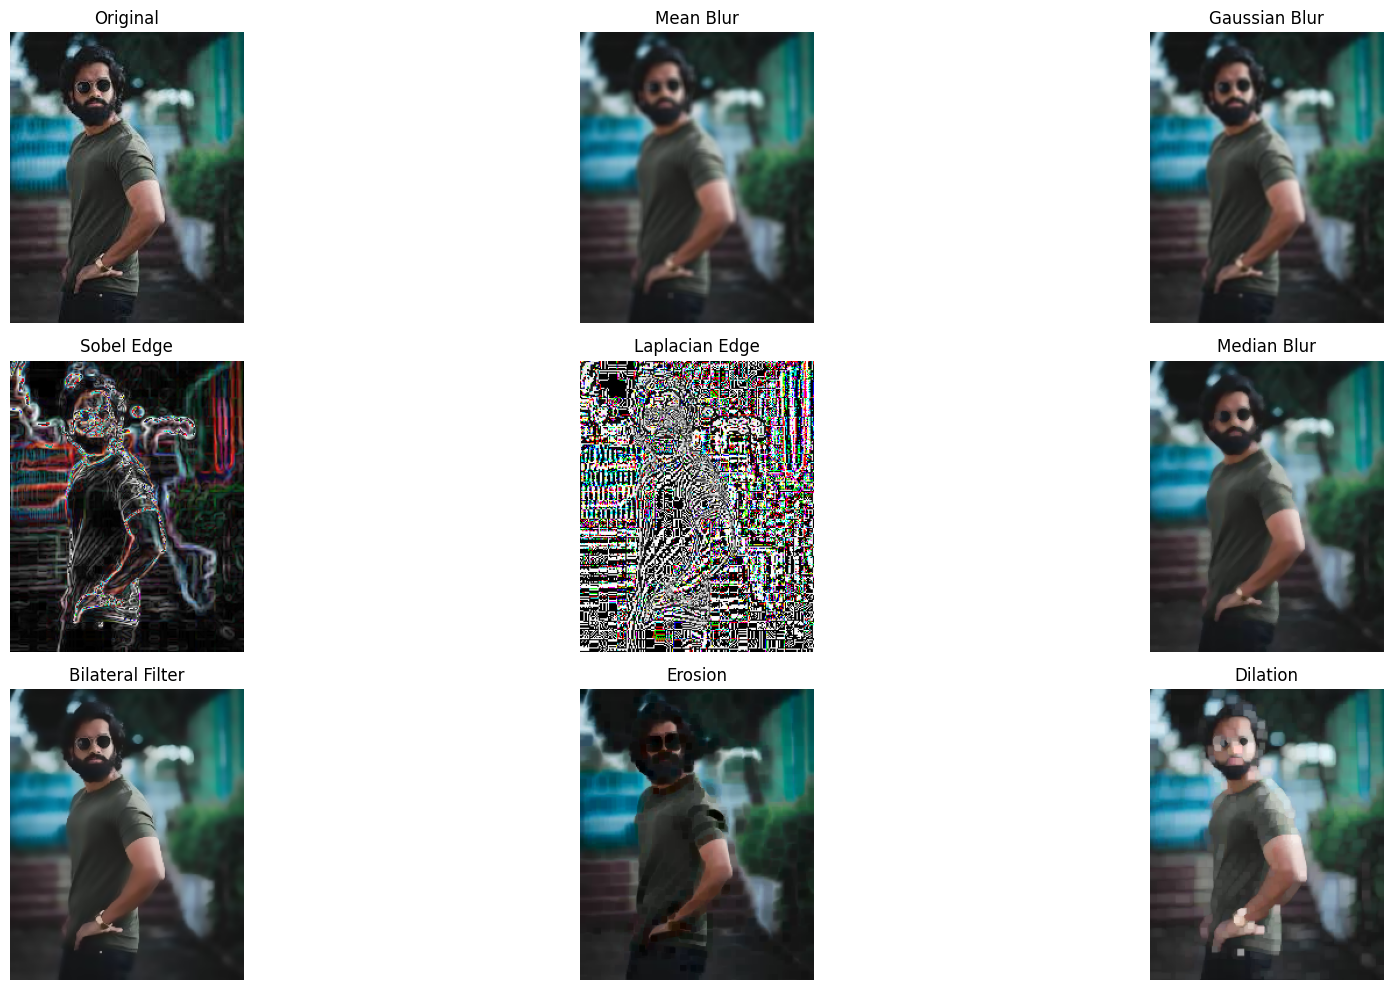


2. Demonstrating frequency domain filters...


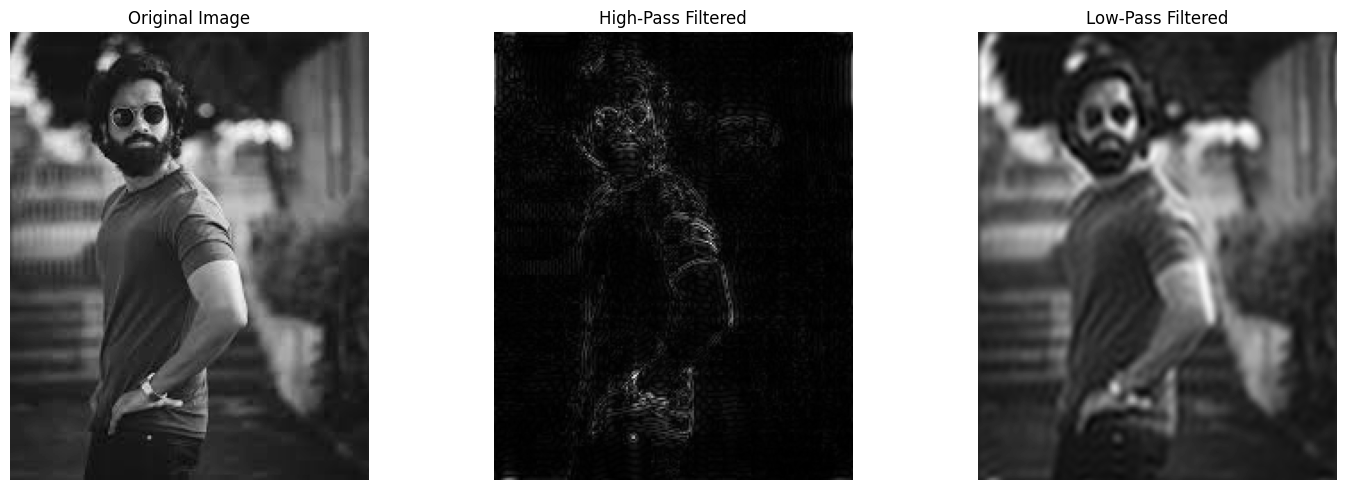


3. Showing texture analysis with Gabor filters...


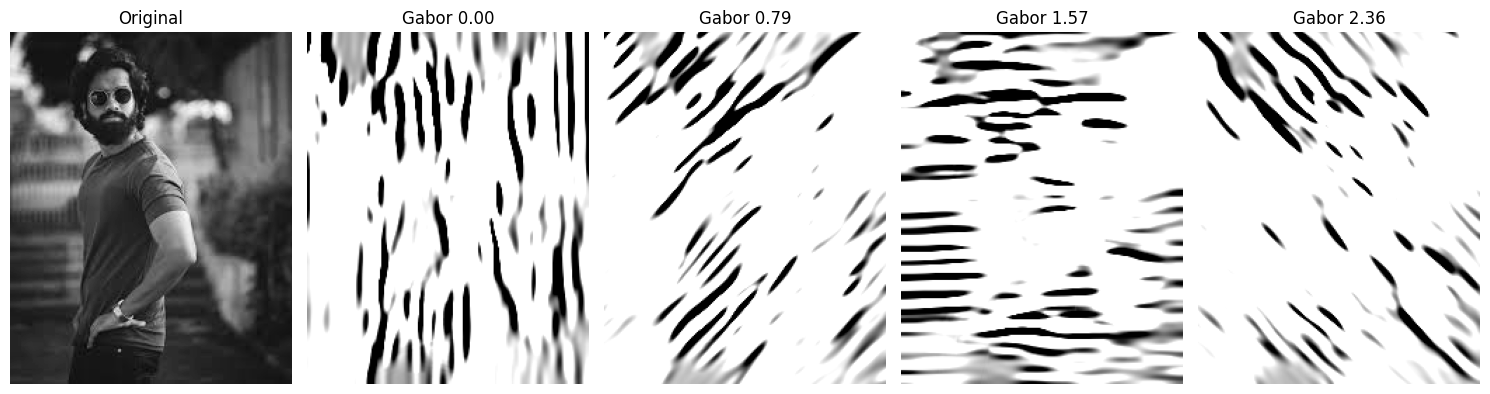

In [6]:
# Example usage
image_path = "C:\\Users\\saive\\Pictures\\test\\aj2.jpeg" # Replace with your image path
print("1. Applying various spatial filters...")
apply_filters(image_path)

print("\n2. Demonstrating frequency domain filters...")
frequency_domain_filters(image_path)

print("\n3. Showing texture analysis with Gabor filters...")
texture_analysis(image_path)